# Microlensing waveform for moving lens

## Assumption:
1. The source part of the time delay variation cannot be taken into account because they are common to both images (i.e. it can be factored into the source waveform)
2. Assume monochromatic waves to begin with

## Goal:
1. Work out the frequency and time domain waveform for both cases
2. Figure out the detection criteria and compared it with Liao et. al. (2019)


## Derivations:
Recall the lensed waveform is: 
$$
h_L(f) = F(f;t) \,h(f)
$$

The source waveform in time domain is:
$$
h(t) = A\cos(2\pi f_0 (t-t_0))
$$
Therefore the frequency domain waveform is (We just plot $f>0$ because the $-f$ part can be obtained by reflection + complex conjugate)

$$
h(f) = \frac{A}{2} \delta(f-f_0) e^{-2\pi f i t_0}
$$

Therefore the time domain, lensed waveform is:

$$
h_L(t) = \int_0^{\infty} F(f;t) \frac{A}{2} \delta(f-f_0) e^{-2\pi f i t_0} e^{2\pi i f}df + \text{C.C.}
$$
where C.C. is the complex conjugate. At the end we get:

$$
h_L(t) = F(f_0;t) \frac{A}{2} e^{2\pi f i (t-t_0)} + \text{C.C.}
$$

Because of the complex conjugate, we simply have to calculate the real part of the thing here:
$$
h_L(t) = \text{Re} \{F(f_0;t) A e^{2\pi f i (t-t_0)}\}
$$

It is tempting to just copy the results from Nakahashi et. al., but this is wrong because they normalize the time delay by a $y$ dependent factor so that the time of arrivial for the first image is always $0$. This cannot be the case for moving lens because in this situation the relative time delay between different source position matters.

Keep in mind that the time delay is:
$$
t_d \propto \frac{1}{2} \left|\vec x - \vec y\right|^2 - \psi \left(\vec x\right) + \phi \left(\vec y\right)
$$
The main difference between us and Takahashi is that they choose $\phi$ in such a way so that the first image is always $t_d=0$. Also this is different from diffraction because for diffraction we only need to determine the relative frequency evolution to determine the coherence time. But we do not want that for microlensing, therefore, we simply set a fixed $\vec y$ for $\phi(\vec y)$. This means in the geometric limit, the magnification factor will becomes:

$$
F_g(f) = |\mu_+\left(\vec x_+, \vec y(t)\right)|^{1/2}\exp(2\pi i f_0 t_d\left(\vec x_+, \vec y(t)\right) - i|\mu_-\left(\vec x_+, \vec y(t)\right)|^{1/2} \exp(2\pi i f_0 t_d\left(\vec x_-, \vec y(t)\right))
$$

Therefore, the lensed waveform becomes:

\begin{align*}
h_L(t) &= \text{Re} \{\left[|\mu_+(t)|^{1/2}\exp(2\pi i f_0 t^{(1)}_d(t)) - i|\mu_-(t)|^{1/2} \exp(2\pi i f_0 t^{(2)}_d(t)) \right] Ae^{2\pi f_0 i (t-t_0)}\}\\
&= |\mu_+(t)|^{1/2} A \cos(2\pi f_0 (t-t_0+t^{(1)}_d(t))) + |\mu_-(t)|^{1/2}A\sin(2\pi f_0 (t-t_0+t^{(2)}_d(t)))\\
\end{align*}

Let $y_0$ be the source position when the source is closest to the lens. We will normalize our time such that that time is zero.

For the microlensing model, we must first write out the source position as a function of time. In particular, we shall let:

$$
y(t) = \sqrt{y_0^2 + (t/t_E)^2}
$$
Here we have normalized the unit so that time are measured in Einstein crossing time. Since $t$ is measured in Einstein crossing time $t_E$, then frequency, should be measured in $f=\nu\,/t_E$ where $t_E$ is the Einstein crossing time.

The waveform have two things that came into play (in geometric limit)
1. The time delay frequency modulation
2. Interference between the two waves (For a fixed point in space that cannot be resolved, but if you move across the fringes you can see the spatial interference)


Free variables in the system: $M_L$, $z_L$, $z_s$, $v$, $y_0$, $H_0$, $f_0$, $A$

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def img_pos(src_pos):
    k = np.sqrt(src_pos**2 + 4)
    return 0.5*(src_pos+k), 0.5*(src_pos-k)

In [3]:
def _time_delay(x,y):
    # Time delay normalized by 4ML
    return 0.5*(x-y)**2 - np.log(np.abs(x))

In [4]:
def td(x,y,y0):
    # Normalized time delay
    x0,_ = img_pos(y0)
    td0 = _time_delay(x0,y0)
    return _time_delay(x,y)-td0

In [5]:
def mu(y):
    k = (y*y+2)/(2*y*np.sqrt(y*y+4))
    return np.abs(0.5+k), np.abs(0.5-k)

In [6]:
def mu_rt(y):
    mu_p, mu_m = mu(y)
    return np.sqrt(mu_p), np.sqrt(mu_m)

(-1.0, 1.0)

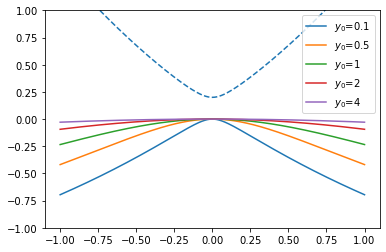

In [7]:
for y0 in [0.1,0.5,1,2,4]:
    ll =  np.linspace(-1,1,1000)
    yy = np.sqrt(y0**2 + ll**2)
    line,  = plt.plot(ll,td(img_pos(yy)[0],yy,y0),label=r'$y_0$='+f'{y0}')
    plt.plot(ll,td(img_pos(yy)[1],yy,y0),ls='--',color=line.get_color())
    
    # Trying to plot out the estimation of the peak and the high t behavior
    #k = (0.5*(-np.sqrt(y0**2+ll**2)+np.sqrt(y0**2+ll**2+4)))**2/2 - np.log(np.abs(np.sqrt(y0**2+ll**2)+np.sqrt(y0**2+ll**2+4))/2)
    #plt.plot(ll,-np.log(np.abs(ll))-(1+y0**2)/(2*ll*ll))
    #plt.axhline(0.5-y0,color='tab:blue',ls='--')
    #plt.axhline(-np.log(y0),color='tab:orange',ls='-.')
    #plt.plot(ll,k)
plt.legend()
plt.ylim(-1,1)


## Step 1: Plot some waveforms that include only the frequency modulation

We can set $A=1$, we can set $\theta_E=1$. We take $M_L \approx 50 M_\odot$, $f_0\approx 1000 \text{ Hz}$. Then we have freedom to choose how fast the lens is moving $v=1/t_E$, which in our units translate to an angular velocity, characterizing how much $\theta_E$ it travels per second. Let's do order of magnitude estimation on the parameters:

\begin{align*}
t_E = \text{164.7 days} \left(\frac{v}{300 \text{km/s}}\right)^{-1} \left(\frac{M_L}{100 M_\odot}\right)^{1/2} \left(\frac{D}{\text{1 kpc}}\right)^{1/2}
\end{align*}

\begin{align*}
t_d \approx 1.97 \text{ ms} \left(\frac{M_L}{100 M_\odot}\right)
\end{align*}

Indeed the correct expression for small $y_0$ $t_d\approx 4(1-y_0) M_L$, but this does not affect the calculation because $y_0\to 0$ you just recover $1$

The correct scaling of $t_d$ for the peak of the + image: 

1. $(1-y_0)M_L$ when $y_0$ is small and $-\log(y_0) M_L$ when $y_0$ is large. 

2. When $t\gg 1$ they scale like $-\log (t)$ to leading order regardless of $y_0$

For the - image
1. For small $y_0$ scale as $(1+y_0)M_L$  and $(1+y_0^2/2)$ for large $y_0$
2. When $t\gg 1$ the scaling is $1+(y_0^2+t^2)/2$


In [8]:
day = 86400 # sec

In [276]:
def waveform_sep(t,A,f0,tE,Ml,y0):
    # Ml: in solar mass
    # y0: in Einstein radius
    # f0: in sec
    # tE: in sec
    # t : in sec
    td0 = 1.97e-3*(Ml/100) # sec
    yy = np.sqrt(y0**2 + (t/tE)**2)
    mmp,mmm = mu_rt(yy)
    print('Magnification: ',max(mmp),max(mmm))
    tdp,tdm = td(img_pos(yy),yy,y0)
    #print(tdp[-1])
    tdp,tdm = td0*tdp, td0*tdm
    print('Time delay: ', tdp[0],tdm[0])
    return mmp*A*np.cos(2*np.pi*f0*(t+tdp)), mmm*A*np.sin(2*np.pi*f0*(t+tdm))

In [326]:
t = np.linspace(-10,10,1000)

Magnification:  2.3439199072492602 2.119896349258468
Time delay:  -5.338786218008568 104.23295032316763
Magnification:  2.3439199072492602 2.119896349258468
Time delay:  -5.338786218008568 104.23295032316763


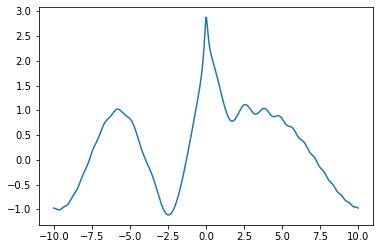

In [330]:
y0 = 0.1
plt.plot(t,waveform_sep(t,A=1,f0=0.1,tE=1,Ml=100000,y0=y0)[0]+waveform_sep(t,A=1,f0=0.1,tE=1,Ml=100000,y0=y0)[1])

Magnification:  2.3439199072492602 2.119896349258468
Time delay:  -5.338786218008568 104.23295032316763
Magnification:  2.3439199072492602 2.119896349258468
Time delay:  -5.338786218008568 104.23295032316763


Text(0.5, 1.0, 'Geometric optics waveform')

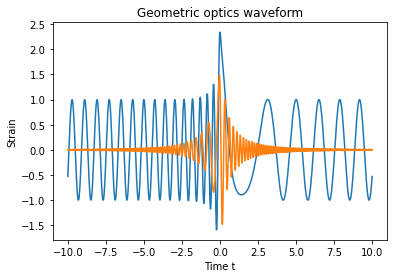

In [291]:
plus_img = waveform_sep(t,A=1,f0=1,tE=1,Ml=100000,y0=0.1)[0]
mins_img = waveform_sep(t,A=1,f0=1,tE=1,Ml=100000,y0=0.1)[1]
plt.plot(t,plus_img)
plt.plot(t,mins_img)
#plt.plot(t,plus_img+mins_img)
plt.xlabel('Time t')
plt.ylabel('Strain')
plt.title('Geometric optics waveform')

Text(0.5, 0, 'Source position $\\ell/\\theta_E$')

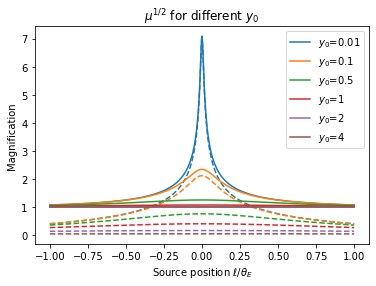

In [292]:
for y0 in [0.01,0.1,0.5,1,2,4]:
    ll =  np.linspace(-1,1,1000)
    yy = np.sqrt(y0**2 + ll**2)
    mp,mm = mu_rt(yy)
    line,  = plt.plot(ll,mp,label=r'$y_0$='+f'{y0}')
    plt.plot(ll,mm,ls='--',color=line.get_color())
plt.legend()
plt.title(r'$\mu^{1/2}$ for different $y_0$')
plt.ylabel('Magnification')
plt.xlabel(r'Source position $\ell/\theta_E$')
#plt.ylim(-1,1)


Conclusion:
1. When the Einstein crossing time is small, a huge frequency shift will be observed. This also means the influence of the secondary image is small because the magnification of the second image decrease rapidly. 
2. When the Einstein crossing time is large, this basically reduces to the typical doppler lensing scenario.
3. However in all case you need a massive object to induce significant timing phase
4. Can we go more massive? Are there anything stopping it from using massive lens? Yes! For a given velocity the crossing time will need to be larger for same mass. How does wave optics save this?

## Step 2: Adding wave optics

Expectation:
1. If the lens is moving slow enough or mass is small enough the integrated phase will not decohere the wave. This means that I should get back Liao et. al. 's diffraction results
2. If the lens is moving fast maybe it will decohere the diffraction? Due to doppler lensing

To encode the time dependence on $F(f)$ we note that actually $F(f;y)$. Therefore, we just need to do $F(f;y(t))$ to do our paraemeterization, which is actually easier than doing the goemetric optics. 

In [293]:
from mpmath import mp

In [294]:
def w(f,Ml):
    return 8*np.pi*Ml*f

In [295]:
def xm(y):
    return 0.5*(y+np.sqrt(y**2+4))

In [296]:
def phim(y):
    return (xm(y)-y)**2/2 - np.log(xm(y))

In [297]:
def F(f,y,y0,Ml):
    W = w(f,Ml)
    Phim = phim(y0)
    return exp(pi*W/4+(1j*W/2)*(ln(W/2)-2*Phim))*gamma(1-0.5j*W)*hyp1f1(0.5j*W,1,0.5j*W*y*y)

In [298]:
hyp1f1 = np.vectorize(mp.hyp1f1)
gamma = np.vectorize(mp.gamma)
exp = np.vectorize(mp.exp)
pi = np.pi
ln = np.vectorize(mp.log)

In [299]:
def woptics_waveform(t,A,f0,tE,Ml,y0):
    # Ml: in solar mass
    # y0: in Einstein radius
    # f0: in sec
    # tE: in sec
    # t : in sec
    Ml = 4.93e-4*(Ml/100) # sec
    yy = np.sqrt(y0**2 + (t/tE)**2)
    F0 = F(f0,yy,y0,Ml).astype(complex)
    return np.real(F0*A*np.exp(2j*np.pi*f0*t))

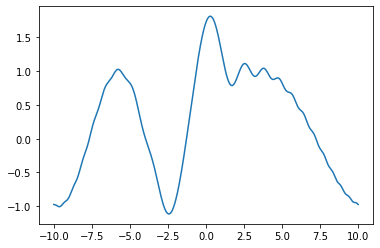

In [303]:
plt.plot(t,woptics_waveform(t,A=1,f0=0.1,tE=1,Ml=100000,y0=0.1))

### Showing that the two actually met in high frequency limit ($8\pi M_L f_0\gg 1$)

Magnification:  2.3439199072492602 2.119896349258468
Time delay:  -0.005338786218008568 0.10423295032316764


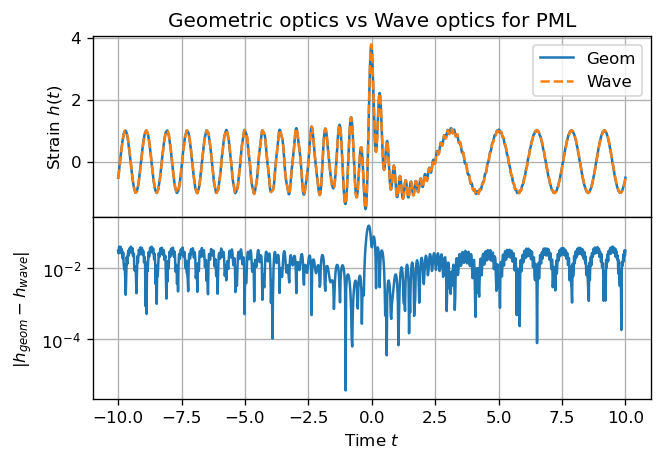

In [341]:
# Plotting the real and imaginary part of the plot abovev for y = 0.1 and using f instead of w
fig, axs = plt.subplots(dpi=120,nrows=2,sharex=True)
t = np.linspace(-10,10,1000)
f0 = 1000
y0 = 0.1
Ml = 100
A = 1
tE = 1

geomOptics = sum(waveform_sep(t,A=A,f0=f0,tE=tE,Ml=Ml,y0=y0))
waveOptics = woptics_waveform(t,A=A,f0=f0,tE=tE,Ml=Ml,y0=y0)


axs[0].plot(t,geomOptics,label='Geom',color='tab:blue')
axs[0].plot(t,waveOptics,label='Wave',color='tab:orange',ls='--')
#ax.plot(f,magn_g.imag,label='Im[F(f)]')
#axs[0].set_xscale('log')
#ax.set_yscale('log')
axs[0].grid(which='major')
axs[0].grid(which='minor')
#ax.set_ylim(0.1,10)
axs[0].legend()

axs[1].plot(t,np.abs(geomOptics-waveOptics))
axs[1].set_yscale('log')
axs[1].grid(which='minor')
axs[1].grid(which='major')


#fig.set_xlabel('F')
#ax.set_aspect(2.3)
axs[1].set_xlabel(r'Time $t$')
axs[0].set_ylabel(r'Strain $h(t)$')
axs[1].set_ylabel(r'$|h_{geom} - h_{wave}|$')
axs[0].set_title('Geometric optics vs Wave optics for PML')
#ax.set_title('Wave optics magnification for $y=0.1$')
fig.subplots_adjust(hspace=0)


# Question: It seems like you only need $f_0 M_l = \text{const}$ why? You better check if the time scales have some problems here.